# Predicting flight prices with Random Forest

## Random Forest

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Data loading and Initial Overview

In [2]:
#Loading dataset from CSV File
data = pd.read_csv('/Users/timbrosi/Desktop/E-Commerce Studium/4. Semester/Data Driven E-Commerce/Final Exam/Flight_Price_Prediction/Flight_Price_Prediction.csv')

In [3]:
#Displaying first few rows of the dataset
print(data.head())

   Unnamed: 0    airline   flight source_city departure_time stops  \
0       36865     Indigo  6E-2005       Delhi        Morning   one   
1      172464  Air_India   AI-541   Hyderabad        Evening   one   
2      284724  Air_India   AI-559   Hyderabad  Early_Morning   one   
3      106515    Vistara   UK-866   Bangalore          Night   one   
4      143103     Indigo   6E-207     Kolkata        Morning   one   

  destination_city     class  duration  days_left  price  
0          Chennai   Economy     10.42         13   7950  
1          Kolkata   Economy     26.92         18   4368  
2          Kolkata  Business      8.00         37  51707  
3          Kolkata   Economy     12.00         28   6271  
4        Hyderabad   Economy      7.83          7  13367  


In [4]:
#Displaying the column names of the dataset
print(data.columns)

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')


### Exploratory Data Analysis (EDA)

In [5]:
#Dropping any non-informative columns
if 'Unnamed: 0' in data.columns:
    data = data.drop(['Unnamed: 0'], axis=1)#axis-1 indicated columns, not a single row

In [6]:
#Checking for missing values in the dataset
print(data.isnull().sum())

airline             29988
flight                  0
source_city             0
departure_time          0
stops                   0
destination_city        0
class                   0
duration                0
days_left               0
price                   0
dtype: int64


In [7]:
#Handling missing values in the column "airline"
if 'airline' in data.columns:
    data['airline'].fillna(data['airline'].mode([0]), inplace=True)#filling missing values with the most frequent value

In [8]:
#Encoding categorical data into numerical format using one-hot encoding
data = pd.get_dummies(data)

In [9]:
#Separating the target variable (price) and features
X = data.drop('price', axis=1)# Features
y = data['price'] # Target variable

### Splitting data into training and testing sets

In [10]:
#Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Initilization and Training

In [11]:
#Initilizing the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [12]:
#Training model with training data
#This model training is taking a really long time, atleast for me, just FYI
model.fit(X_train, y_train)# Fit the model to the training data

RandomForestRegressor(random_state=42)

### Making Predictions and Evaluating the Model

In [13]:
#Making predictions on the test set
y_pred = model.predict(X_test)

In [14]:
#Calculating the Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
#Printing MSE and R^2 score
print (f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 6029396.059758002
R^2 Score: 0.9882549681339263


### Feature Importance Analysis

In [16]:
#Extracting features importances from the model
importance = model.feature_importances_ # get feature importance
feature_names = X.columns # get feature names from the data

In [17]:
#Creating DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

In [18]:
#Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [19]:
#Selecting the top 10 most important features
top_10_features = feature_importance_df.head(10)

In [20]:
#Printing the feature importance DataFrame
print(top_10_features)

                         Feature  Importance
1591               class_Economy    0.519068
1590              class_Business    0.360675
0                       duration    0.049128
1                      days_left    0.017699
3              airline_Air_India    0.007844
1586      destination_city_Delhi    0.003157
1571           source_city_Delhi    0.002658
1584  destination_city_Bangalore    0.001941
1588    destination_city_Kolkata    0.001849
1589     destination_city_Mumbai    0.001775


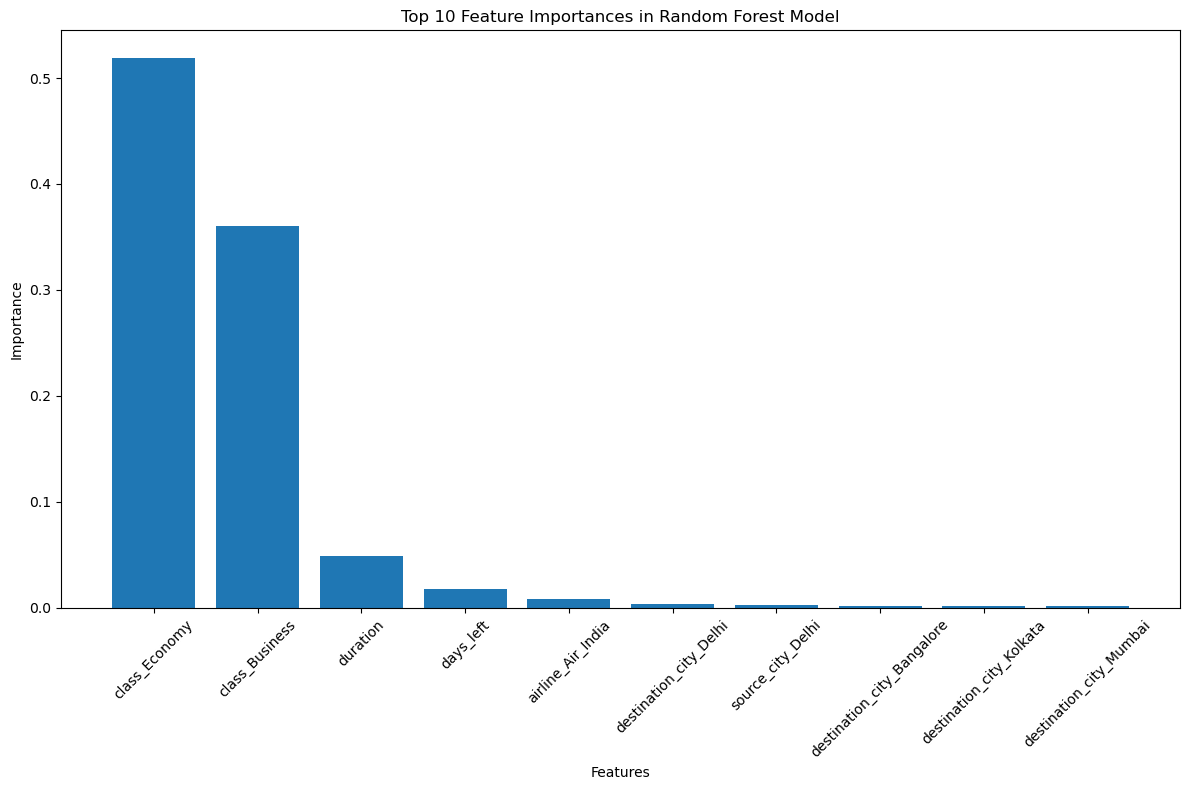

In [21]:
#Plotting Top 10 feature importances
plt.figure(figsize=(12, 8))
plt.bar(top_10_features['Feature'], top_10_features['Importance']) #creating bar plot
plt.xlabel('Features') #setting x-axis label
plt.ylabel('Importance')  #set y-axis label
plt.title('Top 10 Feature Importances in Random Forest Model')  #setting plot title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() #Adjust plot to ensure everything fits without overfitting
plt.show()

### Visualization Actual vs Predicted Prices

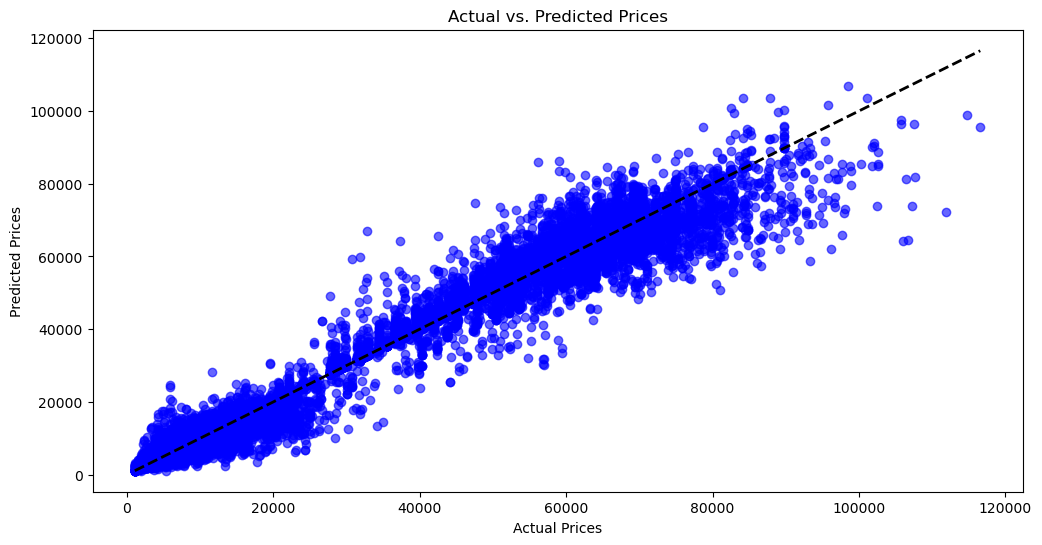

In [22]:
#Scatter plot of acutal vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')#creating scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)#add line for perfect predictions
plt.xlabel('Actual Prices')#set x-axis label
plt.ylabel('Predicted Prices')# set y-axis label
plt.title('Actual vs. Predicted Prices')#setting plot title
plt.show()

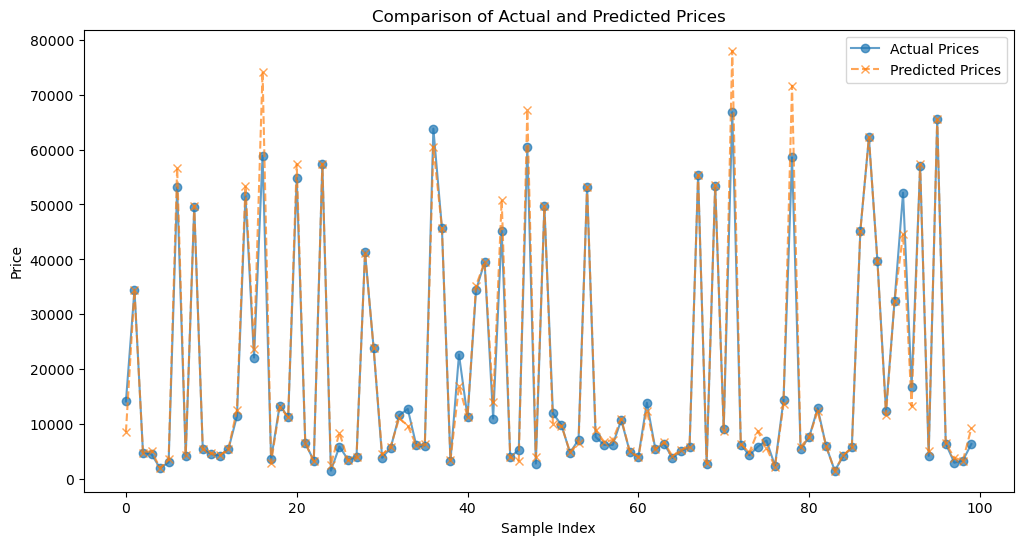

In [23]:
#Comparison plot of acutal and predicted prices for the first 100 samples
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Prices', marker='o', linestyle='-', alpha=0.7)#plot acutal prices
plt.plot(y_pred[:100], label='Predicted Prices', marker='x', linestyle='--', alpha=0.7)#plot predicted prices
plt.xlabel('Sample Index')#set x-axis label
plt.ylabel('Price')#set y-axis label
plt.title('Comparison of Actual and Predicted Prices')#set plot title
plt.legend()#adding legend to the plot
plt.show()

## Interpretation of my results

In [24]:
#Since my R2 score is 0.988, it says that my model is a pretty good fit to predict the prices. 
#The MSE Score might seem high, but when predicting a target variable, which has a large range/high variance, as for flight prices, it's a reasonable result.
